In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 获取当前目录下所有的CSV文件
csv_files = glob.glob('./RGB_data/data_0618.csv')

# 初始化一个空的DataFrame来存储合并后的数据
data = pd.DataFrame()

# 遍历所有CSV文件并将它们合并
for file in csv_files:
    df = pd.read_csv(file)
    data = pd.concat([data, df], ignore_index=True)

# 现在all_data包含了所有CSV文件的数据
print(data)

       B    G    R  Label
0    252  244  234      1
1    253  249  237      1
2    246  240  232      1
3    217  213  205      1
4    230  221  212      1
..   ...  ...  ...    ...
919   70   82   79      0
920   86   84   80      0
921   56   58   49      0
922   66   72   60      0
923   66   62   54      0

[924 rows x 4 columns]


In [3]:
features = data.drop('Label', axis=1) # 按列操作取名为’Label以外的列
labels = data['Label']
features.shape,labels.shape,type(features),type(labels)

((924, 3), (924,), pandas.core.frame.DataFrame, pandas.core.series.Series)

In [4]:
scaler = StandardScaler()

features = scaler.fit_transform(features)
features = pd.DataFrame(features)

#labels = scaler.transform(labels)
features.shape,labels.shape,
type(features),type(labels)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [5]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                     test_size=0.25, random_state=42)

In [6]:
# 创建svm分类器
clf = svm.SVC(kernel='linear')

In [7]:
# 训练模型
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# 预测测试集(实际上是验证集)
y_pred = clf.predict(X_test)

# 数据量
positive_count = data[data['Label'] == 1]['Label'].count()
negative_count = data[data['Label'] == 0]['Label'].count()

print(f'共{data.shape[0]}个数据, {positive_count}个正样本，{negative_count}个负样本\n')

# 计算并打印准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}\n')

# 计算并打印分类报告
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

共924个数据, 402个正样本，522个负样本

Model accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       134
           1       0.97      0.97      0.97        97

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



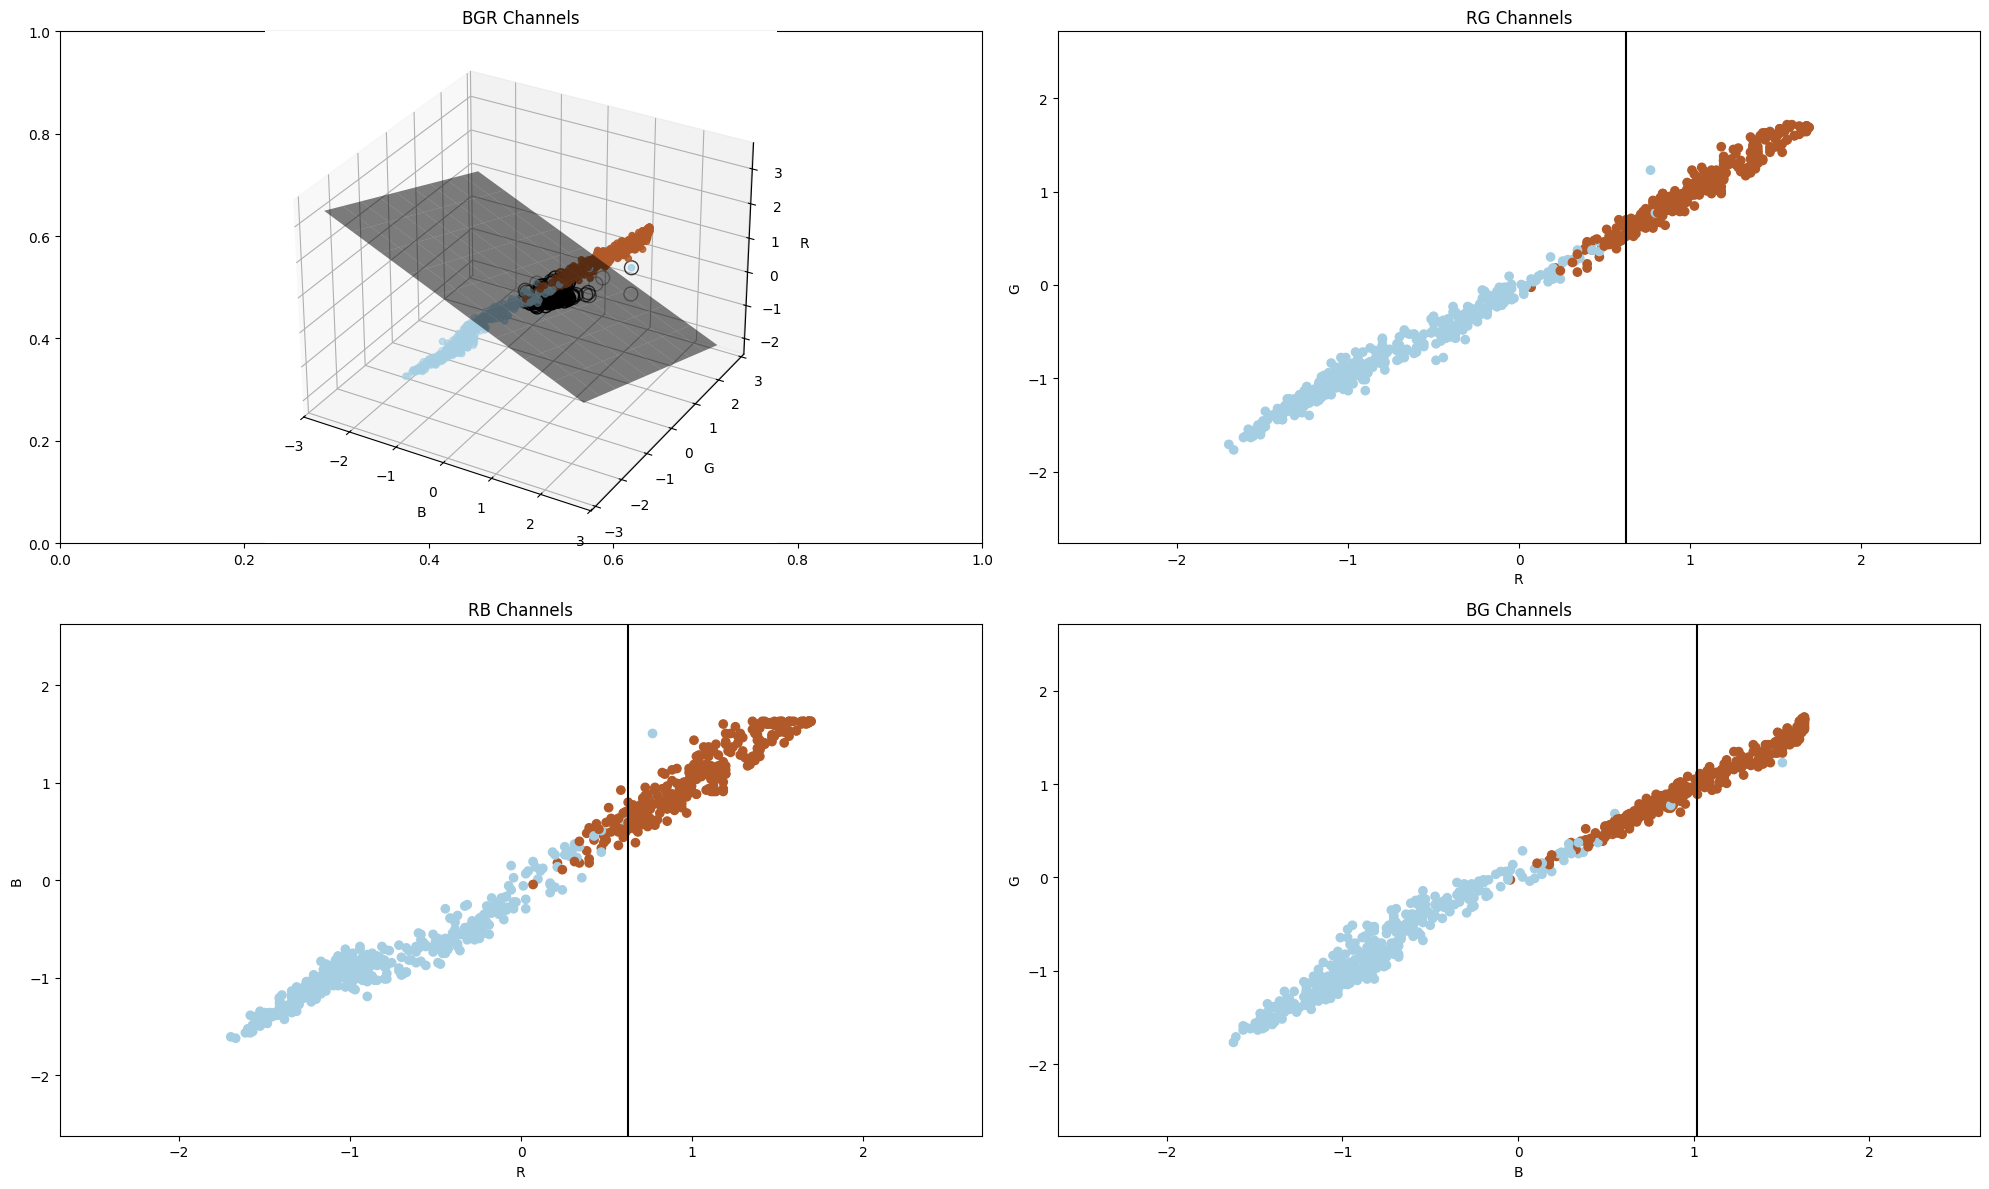

In [12]:
def plot_svm_decision_boundaries(clf, X_train, y_train):
    # 创建一个图形窗口，大小为20x10英寸
    fig = plt.figure(figsize=(20, 12))

    # 创建四个子图，排列为2行2列
    # axs是一个2x2的数组，每个元素代表一个子图对象
    axs = fig.subplots(2, 2)

    # 将子图数组展平，方便索引
    axs = axs.flatten()

    # BGR (3D) 图
    # 创建3D子图，位置在左上角（221表示2行2列中的第1个）
    ax1 = fig.add_subplot(221, projection='3d')
    # 绘制BGR数据点
    ax1.scatter(X_train[0], X_train[1], X_train[2], c=y_train, cmap=plt.cm.Paired)
    # 设置坐标轴标签
    ax1.set_xlabel('B')
    ax1.set_ylabel('G')
    ax1.set_zlabel('R')
    # 设置子图标题
    ax1.set_title('BGR Channels')

    # 获取支持向量
    support_vectors = clf.support_vectors_
    # 在3D图中绘制支持向量
    ax1.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')

    # 计算并绘制决策边界
    w = clf.coef_[0]
    b = clf.intercept_[0]
    xx = np.linspace(X_train[0].min() - 1, X_train[0].max() + 1, 10)
    yy = np.linspace(X_train[1].min() - 1, X_train[1].max() + 1, 10)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[0] / w[2] * X1 - w[1] / w[2] * X2 - b / w[2]
    ax1.plot_surface(X1, X2, Z, alpha=0.5, rstride=1, cstride=1, color='k', linewidth=0)

    # RG 图 21
    ax2 = axs[1]
    ax2.scatter(X_train[2], X_train[1], c=y_train, cmap=plt.cm.Paired)
    ax2.set_xlabel('R')
    ax2.set_ylabel('G')
    ax2.set_title('RG Channels')

    # 在RG图中绘制支持向量
    ax1.scatter(support_vectors[:, 2], support_vectors[:, 1], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')

    # 绘制RG的决策边界
    xx = np.linspace(X_train[2].min() - 1, X_train[2].max() + 1, 500)
    yy = np.linspace(X_train[1].min() - 1, X_train[1].max() + 1, 500)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[2] / w[1] * X1 - b / w[1]
    ax2.contour(X1, X2, Z, colors='k', levels=[0], linestyles=['-'])

    # RB 图 20
    ax3 = axs[2]
    ax3.scatter(X_train[2], X_train[0], c=y_train, cmap=plt.cm.Paired)
    ax3.set_xlabel('R')
    ax3.set_ylabel('B')
    ax3.set_title('RB Channels')

    # 在RB图中绘制支持向量
    ax1.scatter(support_vectors[:, 2], support_vectors[:, 0], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')

    # 绘制RB的决策边界
    xx = np.linspace(X_train[2].min() - 1, X_train[2].max() + 1, 500)
    yy = np.linspace(X_train[0].min() - 1, X_train[0].max() + 1, 500)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[2] / w[0] * X1 - b / w[0]
    ax3.contour(X1, X2, Z, colors='k', levels=[0], linestyles=['-'])

    # BG 图 01
    ax4 = axs[3]
    ax4.scatter(X_train[0], X_train[1], c=y_train, cmap=plt.cm.Paired)
    ax4.set_xlabel('B')
    ax4.set_ylabel('G')
    ax4.set_title('BG Channels')

    # 在BG图中绘制支持向量
    ax1.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                 linewidth=1, facecolors='none', edgecolors='k')    

    # 绘制BG的决策边界
    xx = np.linspace(X_train[0].min() - 1, X_train[0].max() + 1, 500)
    yy = np.linspace(X_train[1].min() - 1, X_train[1].max() + 1, 500)
    X1, X2 = np.meshgrid(xx, yy)
    Z = -w[0] / w[1] * X1 - b / w[1]
    ax4.contour(X1, X2, Z, colors='k', levels=[0], linestyles=['-'])

    # 自动调整子图布局，避免重叠
    plt.tight_layout()
    # 显示图形
    plt.show()

# 假设X_train是训练数据，y_train是标签，clf是训练好的SVM模型
# 调用函数，传入SVM模型、训练数据、标签和特征名称
plot_svm_decision_boundaries(clf, X_train, y_train)

In [15]:
from joblib import dump, load

# 假设 clf 是你的训练好的 SVM 模型
# clf = SVC().fit(X_train, y_train)

# 保存模型
dump(clf, './model/svm_model.joblib')

# 加载模型
clf_loaded = load('./model/svm_model.joblib')